In [2]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')


In [3]:
df = pd.read_csv("../data/processed/cleaned_data.csv")

In [4]:
df['date'] = pd.to_datetime(df['date'])
df = df.sort_values('date').reset_index(drop=True)

df.head()

,id,district,market,commodity,variety,grade,min_price,max_price,modal_price,date,state
0,151,Paschim Bardhaman,Asansol,Wheat,Kalyan,FAQ,2500.0,2700.0,2650.0,2024-08-15,West Bengal
1,8525,Kozhikode(Calicut),Perambra,Cauliflower,Cauliflower,FAQ,3000.0,4000.0,4000.0,2024-08-15,Kerala
2,1425,Ganganagar,Sriganganagar (F&V),Bhindi(Ladies Finger),Other,FAQ,2900.0,3300.0,3100.0,2024-08-15,Rajasthan
3,8701,Gurdaspur,Kalanaur,Green Chilli,Green Chilly,FAQ,4500.0,4500.0,4500.0,2024-08-15,Punjab
4,14224,Amroha,Hasanpur,Cabbage,Cabbage,FAQ,1410.0,1500.0,1450.0,2024-08-15,Uttar Pradesh


In [5]:
df['target'] = np.log1p(df['modal_price'])


In [6]:
df.head()

,id,district,market,commodity,variety,grade,min_price,max_price,modal_price,date,state,target
0,151,Paschim Bardhaman,Asansol,Wheat,Kalyan,FAQ,2500.0,2700.0,2650.0,2024-08-15,West Bengal,7.882692
1,8525,Kozhikode(Calicut),Perambra,Cauliflower,Cauliflower,FAQ,3000.0,4000.0,4000.0,2024-08-15,Kerala,8.294300
2,1425,Ganganagar,Sriganganagar (F&V),Bhindi(Ladies Finger),Other,FAQ,2900.0,3300.0,3100.0,2024-08-15,Rajasthan,8.039480
3,8701,Gurdaspur,Kalanaur,Green Chilli,Green Chilly,FAQ,4500.0,4500.0,4500.0,2024-08-15,Punjab,8.412055
4,14224,Amroha,Hasanpur,Cabbage,Cabbage,FAQ,1410.0,1500.0,1450.0,2024-08-15,Uttar Pradesh,7.280008


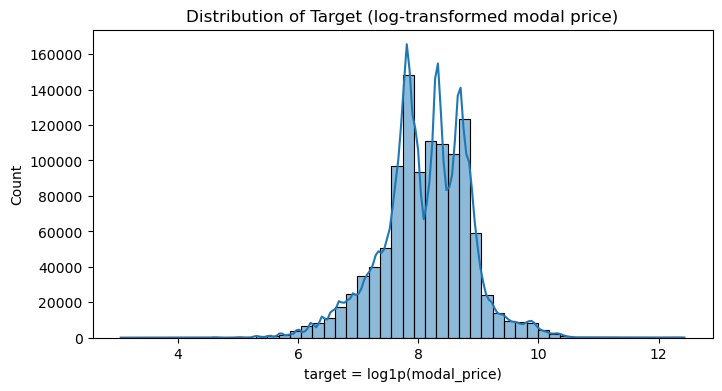

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,4))
sns.histplot(df['target'], bins=50, kde=True)
plt.title("Distribution of Target (log-transformed modal price)")
plt.xlabel("target = log1p(modal_price)")
plt.show()


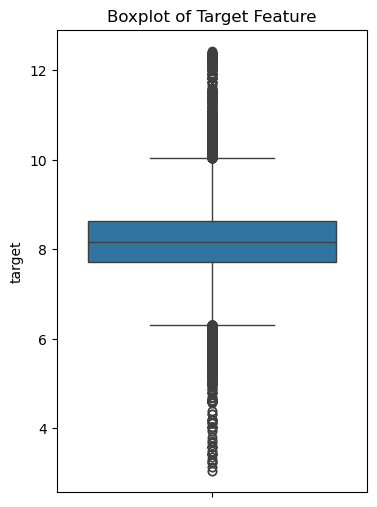

In [8]:
plt.figure(figsize=(4,6))
sns.boxplot(y=df['target'])
plt.title("Boxplot of Target Feature")
plt.show()


In [9]:
df['price_spread'] = df['max_price'] - df['min_price']
df['price_spread_ratio'] = df['price_spread'] / (df['modal_price'] + 1)

df['modal_to_min_ratio'] = df['modal_price'] / (df['min_price'] + 1)
df['modal_to_max_ratio'] = df['modal_price'] / (df['max_price'] + 1)


In [10]:
df['month'] = df['date'].dt.month
df['week'] = df['date'].dt.isocalendar().week.astype(int)

df['month_sin'] = np.sin(2*np.pi*df['month']/12)
df['month_cos'] = np.cos(2*np.pi*df['month']/12)


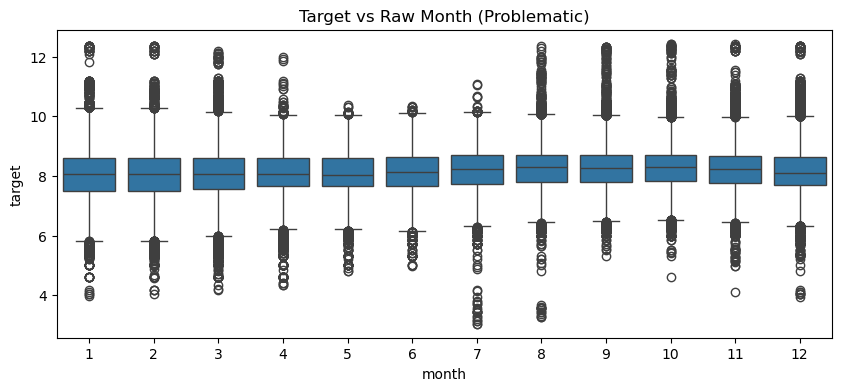

In [11]:
plt.figure(figsize=(10,4))
sns.boxplot(x='month', y='target', data=df)
plt.title("Target vs Raw Month (Problematic)")
plt.show()


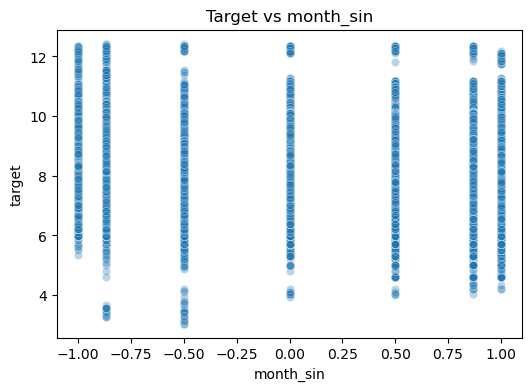

In [12]:
plt.figure(figsize=(6,4))
sns.scatterplot(x='month_sin', y='target', data=df, alpha=0.3)
plt.title("Target vs month_sin")
plt.show()


In [13]:
df.head()

,id,district,market,commodity,variety,grade,min_price,max_price,modal_price,date,state,target,price_spread,price_spread_ratio,modal_to_min_ratio,modal_to_max_ratio,month,week,month_sin,month_cos
0,151,Paschim Bardhaman,Asansol,Wheat,Kalyan,FAQ,2500.0,2700.0,2650.0,2024-08-15,West Bengal,7.882692,200.0,0.075443,1.059576,0.981118,8,33,-0.866025,-0.5
1,8525,Kozhikode(Calicut),Perambra,Cauliflower,Cauliflower,FAQ,3000.0,4000.0,4000.0,2024-08-15,Kerala,8.294300,1000.0,0.249938,1.332889,0.999750,8,33,-0.866025,-0.5
2,1425,Ganganagar,Sriganganagar (F&V),Bhindi(Ladies Finger),Other,FAQ,2900.0,3300.0,3100.0,2024-08-15,Rajasthan,8.039480,400.0,0.128991,1.068597,0.939109,8,33,-0.866025,-0.5
3,8701,Gurdaspur,Kalanaur,Green Chilli,Green Chilly,FAQ,4500.0,4500.0,4500.0,2024-08-15,Punjab,8.412055,0.0,0.000000,0.999778,0.999778,8,33,-0.866025,-0.5
4,14224,Amroha,Hasanpur,Cabbage,Cabbage,FAQ,1410.0,1500.0,1450.0,2024-08-15,Uttar Pradesh,7.280008,90.0,0.062026,1.027640,0.966023,8,33,-0.866025,-0.5


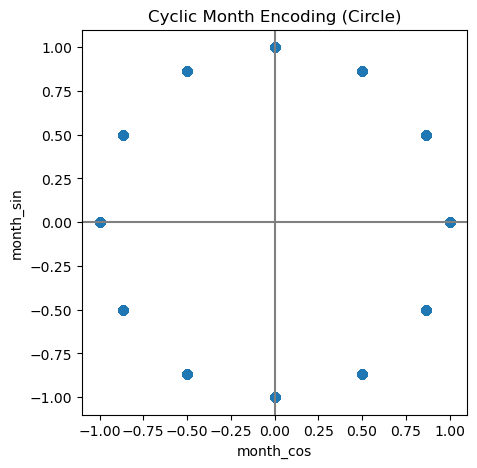

In [14]:
plt.figure(figsize=(5,5))
plt.scatter(df['month_cos'], df['month_sin'], alpha=0.3)
plt.xlabel("month_cos")
plt.ylabel("month_sin")
plt.title("Cyclic Month Encoding (Circle)")
plt.axhline(0, color='gray')
plt.axvline(0, color='gray')
plt.gca().set_aspect('equal')
plt.show()


In [15]:
commodity_stats = df.groupby('commodity')['modal_price'].agg(
    commodity_mean='mean',
    commodity_std='std'
)

df = df.merge(commodity_stats, on='commodity', how='left')

# df['commodity_price_zscore'] = (
#     (df['modal_price'] - df['commodity_mean']) /
#     (df['commodity_std'] + 1)
# )
eps = 1e-6
df['commodity_price_zscore'] = (
    (df['modal_price'] - df['commodity_mean']) /
    (df['commodity_std'] + eps)
)



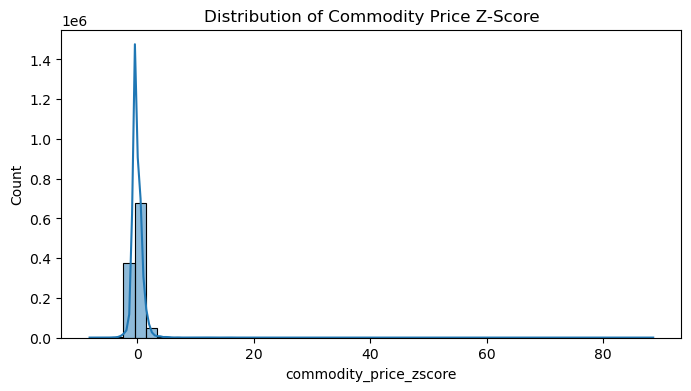

In [16]:
plt.figure(figsize=(8,4))
sns.histplot(df['commodity_price_zscore'], bins=50, kde=True)
plt.title("Distribution of Commodity Price Z-Score")
plt.xlabel("commodity_price_zscore")
plt.show()

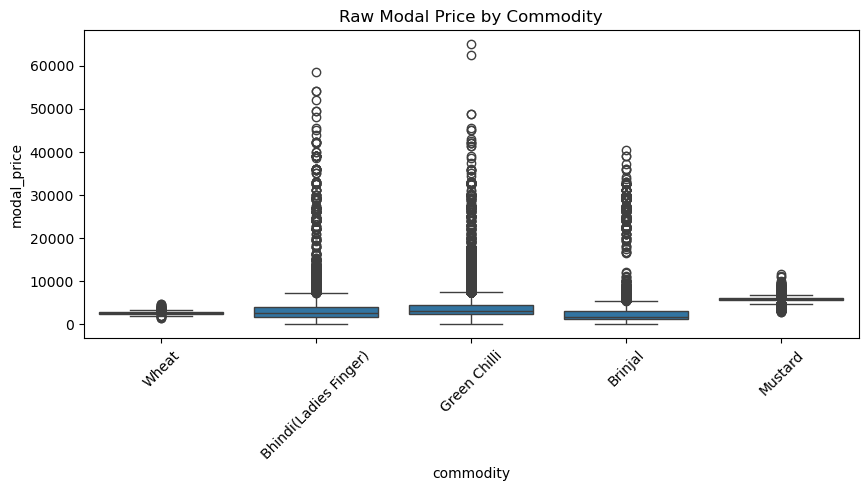

In [17]:
top_commodities = df['commodity'].value_counts().head(5).index

plt.figure(figsize=(10,4))
sns.boxplot(
    x='commodity',
    y='modal_price',
    data=df[df['commodity'].isin(top_commodities)]
)
plt.title("Raw Modal Price by Commodity")
plt.xticks(rotation=45)
plt.show()


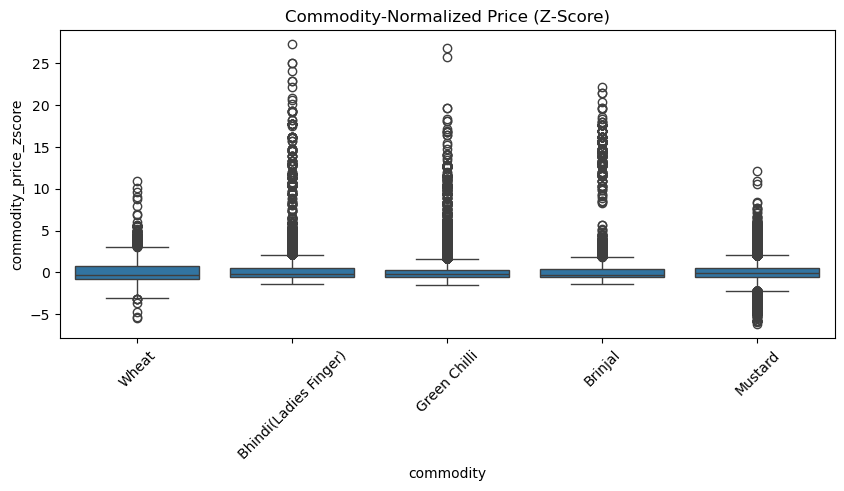

In [18]:
plt.figure(figsize=(10,4))
sns.boxplot(
    x='commodity',
    y='commodity_price_zscore',
    data=df[df['commodity'].isin(top_commodities)]
)
plt.title("Commodity-Normalized Price (Z-Score)")
plt.xticks(rotation=45)
plt.show()


In [19]:
df.head()

,id,district,market,commodity,variety,grade,min_price,max_price,modal_price,date,...,price_spread_ratio,modal_to_min_ratio,modal_to_max_ratio,month,week,month_sin,month_cos,commodity_mean,commodity_std,commodity_price_zscore
0,151,Paschim Bardhaman,Asansol,Wheat,Kalyan,FAQ,2500.0,2700.0,2650.0,2024-08-15,...,0.075443,1.059576,0.981118,8,33,-0.866025,-0.5,2622.745395,196.122533,0.138967
1,8525,Kozhikode(Calicut),Perambra,Cauliflower,Cauliflower,FAQ,3000.0,4000.0,4000.0,2024-08-15,...,0.249938,1.332889,0.999750,8,33,-0.866025,-0.5,2325.202288,2795.483995,0.599108
2,1425,Ganganagar,Sriganganagar (F&V),Bhindi(Ladies Finger),Other,FAQ,2900.0,3300.0,3100.0,2024-08-15,...,0.128991,1.068597,0.939109,8,33,-0.866025,-0.5,3014.242126,2033.746304,0.042167
3,8701,Gurdaspur,Kalanaur,Green Chilli,Green Chilly,FAQ,4500.0,4500.0,4500.0,2024-08-15,...,0.000000,0.999778,0.999778,8,33,-0.866025,-0.5,3710.494545,2285.883067,0.345383
4,14224,Amroha,Hasanpur,Cabbage,Cabbage,FAQ,1410.0,1500.0,1450.0,2024-08-15,...,0.062026,1.027640,0.966023,8,33,-0.866025,-0.5,1884.590167,1863.043007,-0.233269


In [20]:
market_avg = df.groupby('market')['modal_price'].mean()
df['market_avg_price'] = df['market'].map(market_avg)

state_avg = df.groupby('state')['modal_price'].mean()
df['state_avg_price'] = df['state'].map(state_avg)


In [21]:
df['market_price_deviation'] = df['modal_price'] - df['market_avg_price']


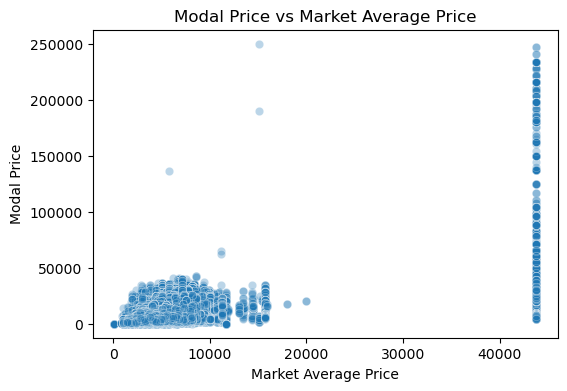

In [22]:
plt.figure(figsize=(6,4))
sns.scatterplot(
    x='market_avg_price',
    y='modal_price',
    data=df,
    alpha=0.3
)
plt.xlabel("Market Average Price")
plt.ylabel("Modal Price")
plt.title("Modal Price vs Market Average Price")
plt.show()


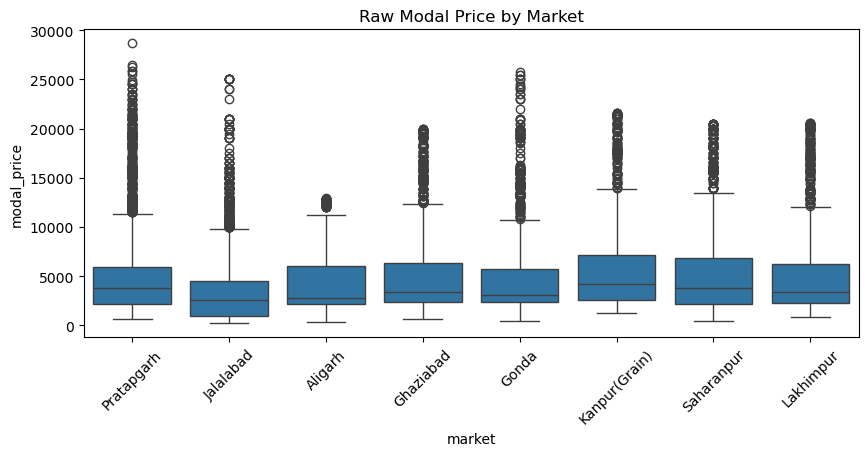

In [23]:
top_markets = df['market'].value_counts().head(8).index

plt.figure(figsize=(10,4))
sns.boxplot(
    x='market',
    y='modal_price',
    data=df[df['market'].isin(top_markets)]
)
plt.xticks(rotation=45)
plt.title("Raw Modal Price by Market")
plt.show()


In [24]:
df.head()

,id,district,market,commodity,variety,grade,min_price,max_price,modal_price,date,...,month,week,month_sin,month_cos,commodity_mean,commodity_std,commodity_price_zscore,market_avg_price,state_avg_price,market_price_deviation
0,151,Paschim Bardhaman,Asansol,Wheat,Kalyan,FAQ,2500.0,2700.0,2650.0,2024-08-15,...,8,33,-0.866025,-0.5,2622.745395,196.122533,0.138967,5302.754356,4370.801956,-2652.754356
1,8525,Kozhikode(Calicut),Perambra,Cauliflower,Cauliflower,FAQ,3000.0,4000.0,4000.0,2024-08-15,...,8,33,-0.866025,-0.5,2325.202288,2795.483995,0.599108,4666.097308,6259.252146,-666.097308
2,1425,Ganganagar,Sriganganagar (F&V),Bhindi(Ladies Finger),Other,FAQ,2900.0,3300.0,3100.0,2024-08-15,...,8,33,-0.866025,-0.5,3014.242126,2033.746304,0.042167,4963.324032,4418.007666,-1863.324032
3,8701,Gurdaspur,Kalanaur,Green Chilli,Green Chilly,FAQ,4500.0,4500.0,4500.0,2024-08-15,...,8,33,-0.866025,-0.5,3710.494545,2285.883067,0.345383,3215.880536,3567.178445,1284.119464
4,14224,Amroha,Hasanpur,Cabbage,Cabbage,FAQ,1410.0,1500.0,1450.0,2024-08-15,...,8,33,-0.866025,-0.5,1884.590167,1863.043007,-0.233269,2280.989670,3942.986878,-830.989670


In [25]:
df = df.sort_values('date')

df['lag_1'] = df.groupby(['market','commodity'])['modal_price'].shift(1)
df['lag_7'] = df.groupby(['market','commodity'])['modal_price'].shift(7)

df['pct_change_7'] = (df['modal_price'] - df['lag_7']) / (df['lag_7'] + 1)


In [26]:
df.head()

,id,district,market,commodity,variety,grade,min_price,max_price,modal_price,date,...,month_cos,commodity_mean,commodity_std,commodity_price_zscore,market_avg_price,state_avg_price,market_price_deviation,lag_1,lag_7,pct_change_7
0,151,Paschim Bardhaman,Asansol,Wheat,Kalyan,FAQ,2500.0,2700.0,2650.0,2024-08-15,...,-0.5,2622.745395,196.122533,0.138967,5302.754356,4370.801956,-2652.754356,NaN,NaN,NaN
828,3229,Kollam,Chathanoor,Carrot,Other,FAQ,14800.0,15200.0,15000.0,2024-08-15,...,-0.5,3581.234716,4358.162513,2.620087,6180.330579,6259.252146,8819.669421,NaN,NaN,NaN
827,31812,Shahjahanpur,Tilhar,Brinjal,Round/Long,FAQ,1790.0,1890.0,1840.0,2024-08-15,...,-0.5,2317.446171,1712.154131,-0.278857,3098.245199,3942.986878,-1258.245199,NaN,NaN,NaN
826,2439,Rajkot,Upleta,Soyabean,Soyabeen,FAQ,3500.0,3850.0,3800.0,2024-08-15,...,-0.5,4116.846694,306.040613,-1.035309,5197.112845,4248.231537,-1397.112845,NaN,NaN,NaN
825,13844,Wayanad,Sultan bathery,Ginger(Green),Green Ginger,FAQ,6000.0,6200.0,6100.0,2024-08-15,...,-0.5,5774.683265,5392.421232,0.060329,2599.664894,6259.252146,3500.335106,NaN,NaN,NaN


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1117630 entries, 0 to 1117629
Data columns (total 29 columns):
 #   Column                  Non-Null Count    Dtype         
---  ------                  --------------    -----         
 0   id                      1117630 non-null  int64         
 1   district                1117630 non-null  object        
 2   market                  1117630 non-null  object        
 3   commodity               1117630 non-null  object        
 4   variety                 1117630 non-null  object        
 5   grade                   1117630 non-null  object        
 6   min_price               1117630 non-null  float64       
 7   max_price               1117630 non-null  float64       
 8   modal_price             1117630 non-null  float64       
 9   date                    1117630 non-null  datetime64[ns]
 10  state                   1117630 non-null  object        
 11  target                  1117630 non-null  float64       
 12  price_spread       

In [28]:
df[['lag_1','lag_7','pct_change_7']].isna().sum()


lag_1            7964
lag_7           51237
pct_change_7    51237
dtype: int64

In [29]:
df.sample(10)

,id,district,market,commodity,variety,grade,min_price,max_price,modal_price,date,...,month_cos,commodity_mean,commodity_std,commodity_price_zscore,market_avg_price,state_avg_price,market_price_deviation,lag_1,lag_7,pct_change_7
957682,20871,Bulandshahar,Khurja,Gur(Jaggery),Red,FAQ,3850.0,4150.0,4050.0,2025-06-23,...,-1.000000e+00,4087.739661,496.312757,-0.076040,3526.030200,3942.986878,523.969800,4050.0,4050.0,0.000000
858560,2571,Ropar (Rupnagar),Ropar,Mango,Totapuri,Medium,4000.0,5500.0,4500.0,2025-05-22,...,-8.660254e-01,4509.215305,2570.158349,-0.003586,5619.861660,3567.178445,-1119.861660,5000.0,4500.0,0.000000
1000114,15757,Ferozpur,Zira,Green Chilli,Green Chilly,FAQ,2500.0,3200.0,2900.0,2025-07-07,...,-8.660254e-01,3710.494545,2285.883067,-0.354565,3576.067261,3567.178445,-676.067261,2500.0,1600.0,0.811993
525145,6949,Muzaffarnagar,Muzzafarnagar,Cabbage,Cabbage,FAQ,500.0,600.0,550.0,2025-02-08,...,5.000000e-01,1884.590167,1863.043007,-0.716350,4258.462626,3942.986878,-3708.462626,560.0,700.0,-0.213980
820074,709,Thirssur,Chavakkad,Garlic,Other,FAQ,12000.0,14000.0,14000.0,2025-05-10,...,-8.660254e-01,12748.545532,13639.233867,0.091754,6715.444015,6259.252146,7284.555985,14000.0,12000.0,0.166653
645419,3615,Thirssur,Chavakkad,Bhindi(Ladies Finger),Other,FAQ,2400.0,3600.0,3600.0,2025-03-17,...,6.123234e-17,3014.242126,2033.746304,0.288019,6715.444015,6259.252146,-3115.444015,5000.0,4000.0,-0.099975
366456,5229,Patiala,Nabha,Garlic,Other,FAQ,24500.0,28000.0,26000.0,2024-12-20,...,1.000000e+00,12748.545532,13639.233867,0.971569,4927.388235,3567.178445,21072.611765,24000.0,20400.0,0.274496
924100,11261,Kanpur Dehat,Pukharayan,Apple,Delicious,Medium,11650.0,11725.0,11700.0,2025-06-12,...,-1.000000e+00,9002.859968,3338.386223,0.807917,4305.946169,3942.986878,7394.053831,11580.0,11250.0,0.039996
424813,14168,Kozhikode(Calicut),Quilandy,Carrot,Other,FAQ,6400.0,6800.0,6500.0,2025-01-08,...,8.660254e-01,3581.234716,4358.162513,0.669724,4200.252781,6259.252146,2299.747219,7000.0,5500.0,0.181785
414430,6352,Amroha,Dhanaura,Wheat,Dara,FAQ,2280.0,2300.0,2290.0,2025-01-05,...,8.660254e-01,2622.745395,196.122533,-1.696620,2100.980630,3942.986878,189.019370,2290.0,2290.0,0.000000


In [30]:
df.shape

(1117630, 29)

In [31]:
# Drop rows with NaNs created by lag features
df = df.dropna().reset_index(drop=True)

# Check shape after dropping
df.shape


(1066393, 29)

In [32]:
df.isna().sum().sort_values(ascending=False).head(10)


id             0
district       0
market         0
commodity      0
variety        0
grade          0
min_price      0
max_price      0
modal_price    0
date           0
dtype: int64

In [33]:
df.head()

,id,district,market,commodity,variety,grade,min_price,max_price,modal_price,date,...,month_cos,commodity_mean,commodity_std,commodity_price_zscore,market_avg_price,state_avg_price,market_price_deviation,lag_1,lag_7,pct_change_7
0,349,Kolkata,Mechua,Mango,Other,Small,5000.0,6000.0,6000.0,2024-08-18,...,-0.5,4509.215305,2570.158349,0.580036,11219.129403,4370.801956,-5219.129403,8000.0,9000.0,-0.333296
1,2827,Jalpaiguri,Belacoba,Brinjal,Other,FAQ,3300.0,3400.0,3400.0,2024-08-18,...,-0.5,2317.446171,1712.154131,0.632276,2758.549967,4370.801956,641.450033,3900.0,3300.0,0.030294
2,949,Kolkata,Mechua,Apple,Apple,Small,12000.0,15000.0,14000.0,2024-08-18,...,-0.5,9002.859968,3338.386223,1.496873,11219.129403,4370.801956,2780.870597,18000.0,15000.0,-0.066662
3,1793,Jalpaiguri,Belacoba,Green Chilli,Green Chilly,FAQ,10500.0,11000.0,10700.0,2024-08-18,...,-0.5,3710.494545,2285.883067,3.057683,2758.549967,4370.801956,7941.450033,6300.0,10400.0,0.028843
4,10382,Jalpaiguri,Jalpaiguri Sadar,Brinjal,Round/Long,FAQ,3800.0,4000.0,3900.0,2024-08-18,...,-0.5,2317.446171,1712.154131,0.924306,2743.373606,4370.801956,1156.626394,3400.0,4000.0,-0.024994


In [110]:
df['target'].describe()


count    1.066393e+06
mean     8.113146e+00
std      7.278974e-01
min      3.044522e+00
25%      7.701200e+00
50%      8.160804e+00
75%      8.639588e+00
max      1.241731e+01
Name: target, dtype: float64

In [111]:
df.to_csv("../data/processed/fe_data.csv", index=False)